In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Major Project-Cleaned Data.csv',index_col=0)
df.head(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,2140870789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,16-07-20
2,1,7646270374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,16-08-10
3,1,1794370372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,16-08-19


In [5]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,190001.000000,1.900010e+05,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,...,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000
mean,0.875069,4.973083e+09,8121.736125,5324.235501,6036.738503,2682.028970,3471.270741,3735.346070,3731.710966,2065.118510,...,2.758138,17.945621,276.634790,0.054160,18.364699,23.639181,6.701870,0.046289,3.401179,4.322936
std,0.330641,2.891752e+09,75738.559034,9223.194003,10924.271289,4308.658816,5763.579581,53814.346634,53558.030669,2375.847873,...,2.555767,17.390373,4267.364414,0.218396,223.312555,26.503844,2.102752,0.201153,8.836749,10.318272
min,0.000000,4.827380e+05,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.462670e+09,243.000000,39.013333,39.952000,270.600000,299.690000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900685e+09,522.000000,1397.020000,1436.350000,1075.300000,1327.200000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,7.503285e+09,974.000000,7102.850000,7664.280000,3336.280000,4170.960000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,9.999895e+09,999520.609400,265926.000000,320630.000000,198926.110000,200148.110000,997717.809600,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# EDA

In [6]:
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [7]:
count_balance_response_pct = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [8]:
bal = pd.DataFrame(df['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

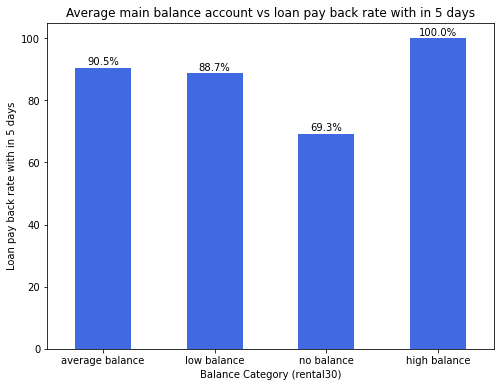

In [9]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot infers us how customers with different main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.

Coming to low balance level people, it is observed that around 30% of people are not paying back the loan with in stipulated 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with no balance, average and high balance level people notifying them to pay the loan back within five days of time

In [10]:
lst = [df]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [11]:
count_fre_response_pct = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [12]:
fre = pd.DataFrame(df['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

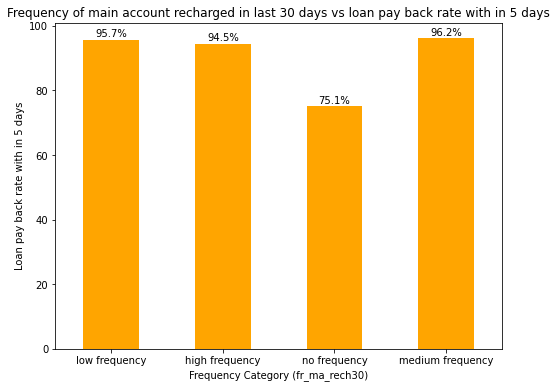

In [13]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('orange'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


The above bar plot infers us how customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5%-6% of people are not paying the loan within 5 days.

Coming to low frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all frequency levels and especially on no frequency level people notifying them to pay the loan back within five days of time

In [14]:
lst = [df]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [15]:
count_loan_response_pct = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [16]:
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

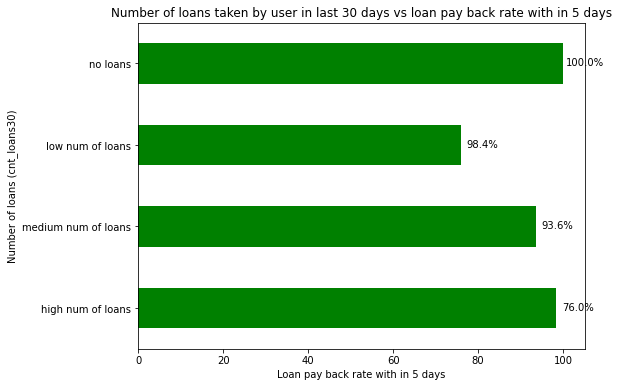

In [17]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('green'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time

In [18]:
lst = [df]
for column in lst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [19]:
count_loanamnt_response_pct = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [20]:
fre1 = pd.DataFrame(df['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

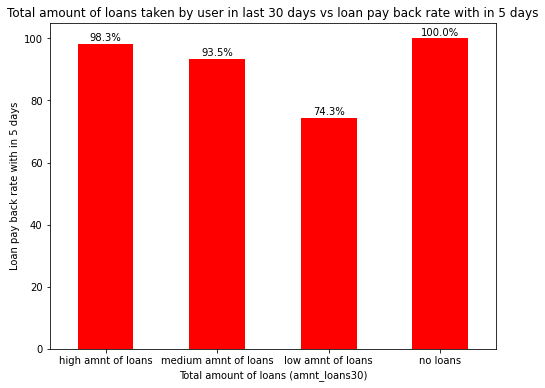

In [21]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('red'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low amount level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people taken high amount of loans are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time.